#### Header

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm

In [58]:
plt.rc("font", size=12)
sns.set_theme(style="white")
sns.set_theme(style="whitegrid", color_codes=True)

In [59]:
xl = pd.ExcelFile("cpd merged final v1.xlsx")
data = xl.parse("cpd merged final")
print(data.shape)

(650, 74)


#### Touchpoint 1

count    650.000000
mean      28.070769
std        5.859519
min       18.000000
25%       24.000000
50%       27.000000
75%       30.000000
max       49.000000
Name: 6. How old are you? , dtype: float64


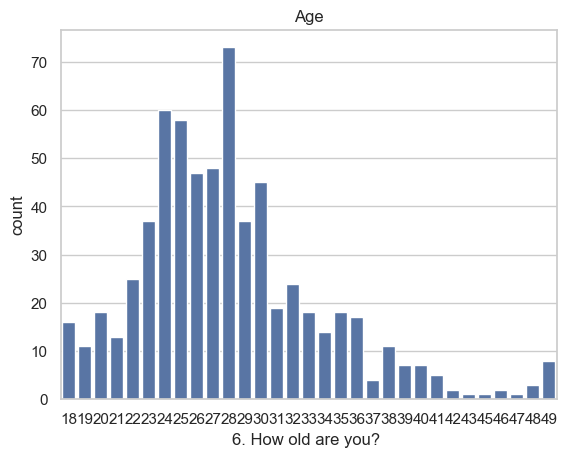

In [60]:
# create a bin for the age range
print(data['6. How old are you? '].describe())

sns.countplot(x='6. How old are you? ', data=data)
plt.title(label='Age')
plt.show()

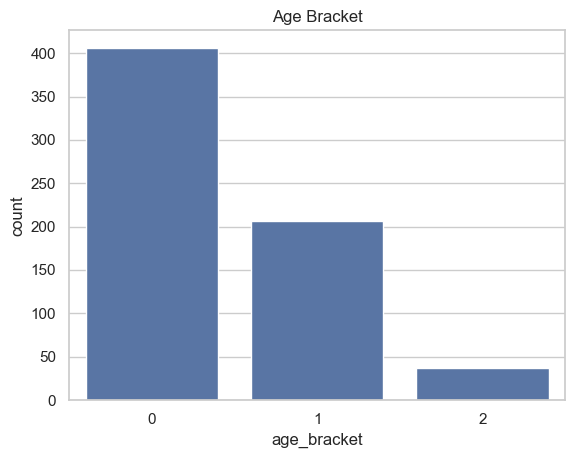

In [61]:
cdata1 = pd.DataFrame()     # Dataframe for conversion 1
temp = pd.DataFrame()
age_bins =[0,29,39,100]
age_labels = ['18-29','30-39','40-49']
new_age_labels = [0,1,2]
temp['age_bracket'] = pd.cut(data['6. How old are you? '], bins=age_bins, labels=age_labels, right=False)
cdata1['age_bracket'] = pd.cut(data['6. How old are you? '], bins=age_bins, labels=new_age_labels, right=False)

sns.countplot(x='age_bracket', data=cdata1)
plt.title(label='Age Bracket')
plt.show()

In [62]:
cdata1['age_bracket'].head()

0    1
1    0
2    1
3    0
4    1
Name: age_bracket, dtype: category
Categories (3, int64): [0 < 1 < 2]

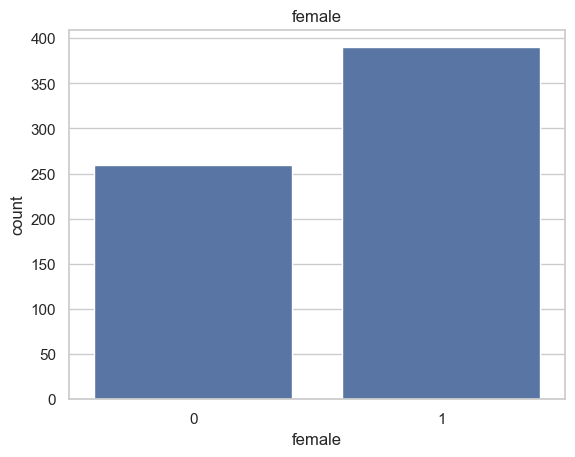

In [63]:
cdata1['female'] = data['female']
sns.countplot(x='female', data=cdata1)
plt.title(label='female')
plt.show()

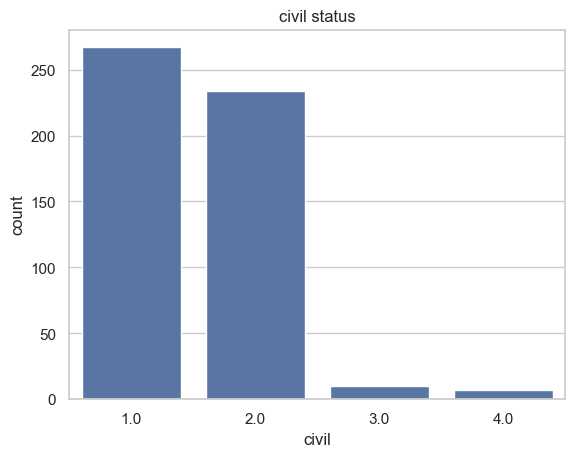

In [64]:
cdata1['civil'] = data['civil']
sns.countplot(x='civil', data=cdata1)
plt.title(label='civil status')
plt.show()

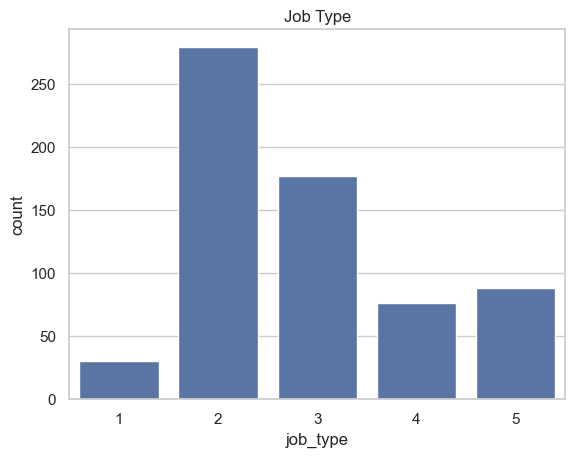

In [65]:
cdata1['job_type'] = data['job type']
sns.countplot(x='job_type', data=cdata1)
plt.title(label='Job Type')
plt.show()

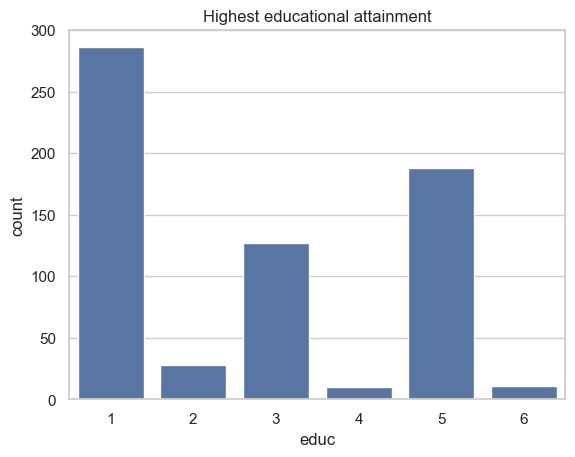

In [66]:
cdata1['educ'] = data['educ']
sns.countplot(x='educ', data=cdata1)
plt.title(label='Highest educational attainment')
plt.show()

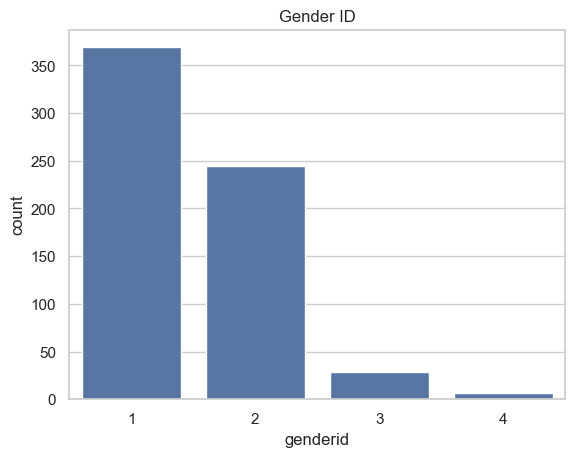

In [67]:
cdata1['genderid'] = data['genderid']
sns.countplot(x='genderid', data=cdata1)
plt.title(label='Gender ID')
plt.show()

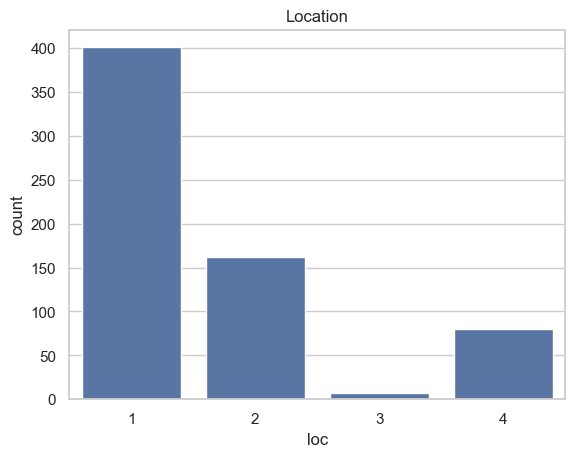

In [68]:
cdata1['loc'] = data['loc']
sns.countplot(x='loc', data=cdata1)
plt.title(label='Location')
plt.show()

In [69]:
# Conversion 1
cdata1['conversion1'] = data['conversion1']
cdata1['conversion1'].value_counts()

conversion1
1.0    401
0.0    117
Name: count, dtype: int64

In [70]:
# Drop Nulll
print(cdata1.shape)
cdata1 = cdata1.dropna()
print(cdata1.shape)

(650, 8)
(518, 8)


In [71]:
#X = cdata1[['job_type']]
X = cdata1[['age_bracket', 'female', 'civil', 'job_type', 'educ', 'genderid']]
y = cdata1['conversion1']

model = sm.Logit(y, X.astype(int)) 
result = model.fit()  

print("\n\nDemographics vs Conversion 1:\n")
print(result.summary())

print('\nOdds Ratio:')
print(np.exp(result.params))

Optimization terminated successfully.
         Current function value: 0.501712
         Iterations 6


Demographics vs Conversion 1:

                           Logit Regression Results                           
Dep. Variable:            conversion1   No. Observations:                  518
Model:                          Logit   Df Residuals:                      512
Method:                           MLE   Df Model:                            5
Date:                Thu, 16 Jan 2025   Pseudo R-squ.:                 0.06088
Time:                        09:10:04   Log-Likelihood:                -259.89
converged:                       True   LL-Null:                       -276.73
Covariance Type:            nonrobust   LLR p-value:                 2.739e-06
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
age_bracket    -0.2728      0.178     -1.532      0.125      -0.622      

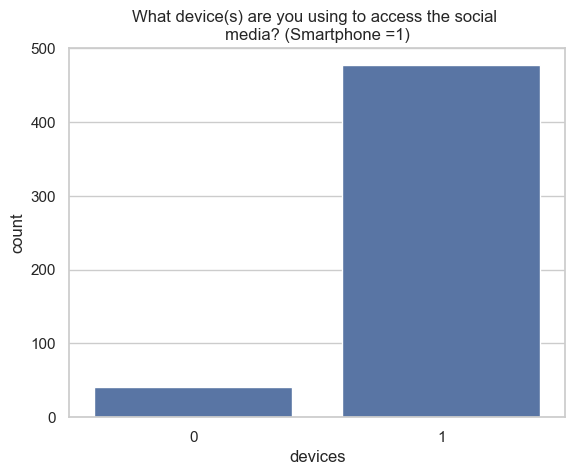

In [72]:
cdata1['devices'] = data['devices']
sns.countplot(x='devices', data=cdata1)
plt.title(label='What device(s) are you using to access the social \nmedia? (Smartphone =1)')
plt.show()

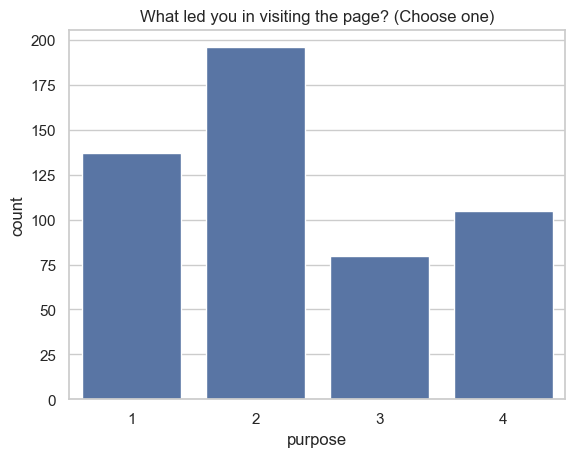

In [73]:
cdata1['purpose'] = data['purpose page']
sns.countplot(x='purpose', data=cdata1)
plt.title(label='What led you in visiting the page? (Choose one)')
plt.show()

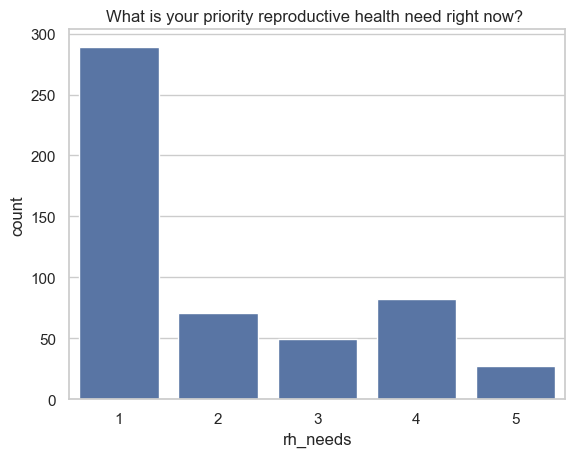

In [74]:
cdata1['rh_needs'] = data['perceived rh needs']
sns.countplot(x='rh_needs', data=cdata1)
plt.title(label='What is your priority reproductive health need right now? ')
plt.show()

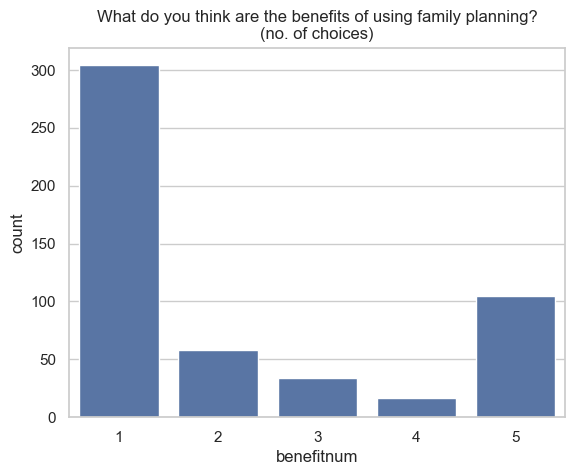

In [75]:
cdata1['benefitnum'] = data['benefitnum']
sns.countplot(x='benefitnum', data=cdata1)
plt.title(label='What do you think are the benefits of using family planning?\n(no. of choices)')
plt.show()

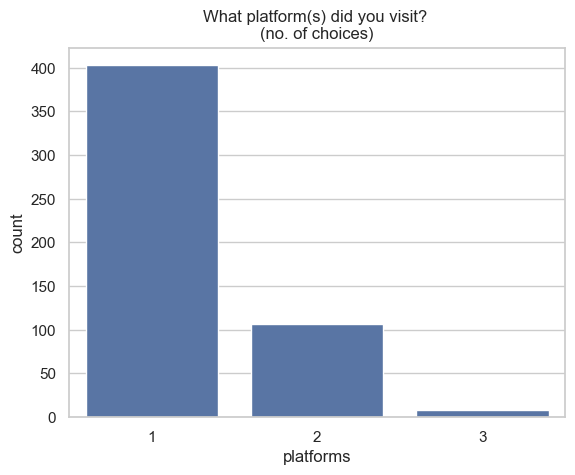

In [76]:
cdata1['platforms'] = data['platforms']
sns.countplot(x='platforms', data=cdata1)
plt.title(label='What platform(s) did you visit? \n(no. of choices)')
plt.show()

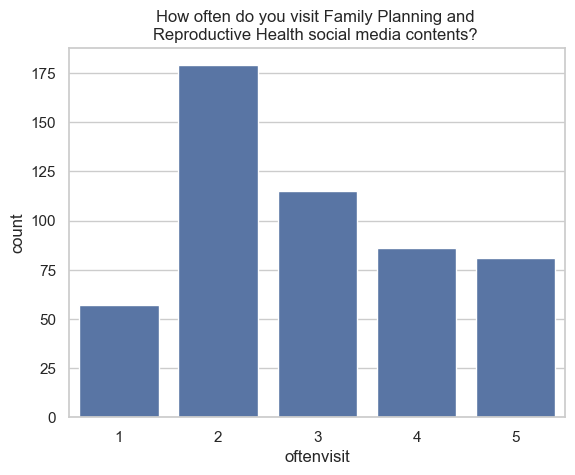

In [77]:
cdata1['oftenvisit'] = data['oftenvisit']
sns.countplot(x='oftenvisit', data=cdata1)
plt.title(label='How often do you visit Family Planning and \nReproductive Health social media contents? ')
plt.show()

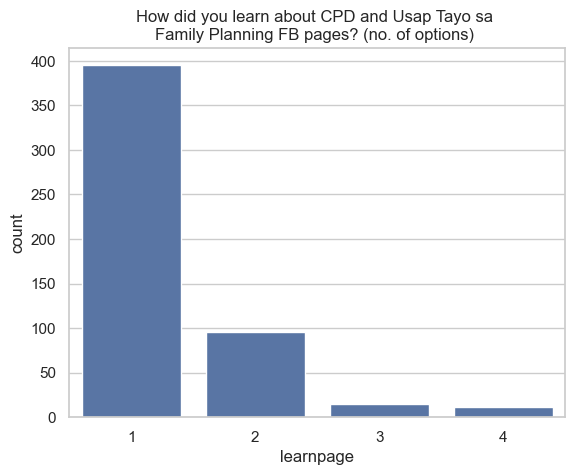

In [78]:
cdata1['learnpage'] = data['learnpage']
sns.countplot(x='learnpage', data=cdata1)
plt.title(label='How did you learn about CPD and Usap Tayo sa \nFamily Planning FB pages? (no. of options) ')
plt.show()

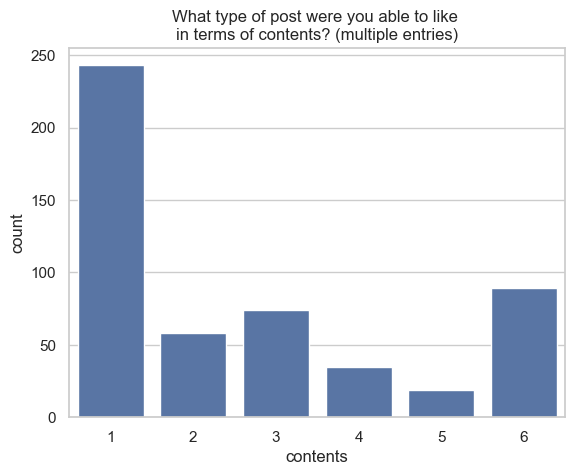

In [79]:
cdata1['contents'] = data['contents']
sns.countplot(x='contents', data=cdata1)
plt.title(label='What type of post were you able to like \nin terms of contents? (multiple entries)')
plt.show()